 
 <div style="margin-top:40px;"></div>

<!-- Prof & TA Information -->
<div style="display:flex; justify-content:space-between;">
    
<div style="width:230%;">
<strong>Professor: </strong> Ashley T. Swanson<br>
OH: TR 2:15 - 3:15 | 7434 Sewell Social Sciences <br>
Email: ashley.swanson@wisc.edu
</div>
    
<div style="width:900%:right;">
<strong>TA: </strong> Alejandro Herrera-Caicedo <br>
OH: TR 4:00 - 5:00 | 7310 Social Sciences<br>
Email: herreracaice@wisc.edu
</div>
</div>

---

<!-- Title + Subtitle -->
<div style="padding:25px; 
            text-align:center; 
            font-size:3em; 
            font-weight:bold;
            margin-bottom:5px;">
  Discussion 2 <br>
  <div style="font-size:0.4em; 
              font-weight:normal;
              margin-top:8px; 
              font-style:italic;
              margin-bottom:10px;">
  Econ 570 – September 19, 2025
  </div>
</div>

<!-- Reminder Box -->
<div style="background-color:#B22222; 
            color:white; 
            padding:15px 25px; 
            border-radius:8px; 
            text-align:center; 
            font-size:1.2em; 
            font-family: Arial, Helvetica, sans-serif;
            font-weight:bold;
            margin-bottom:10px;">
 Reminder: Coding Practice (2.5%) is due tonight!
</div>



<!-- Header for plan for today -->

<div style="padding:10px; 
            text-align:justify; 
            font-size:2em; 
            margin-bottom:5px;">
  Plan for Today </div>

1. Creating Facet Grids with Seaborn
2. Slicing DataFrames using MultiIndex in pandas
3. Merging DataFrames


**Files needed:** `auto_data.dta` ([⬇️](https://canvas.wisc.edu/courses/479130/files/46712385/download?download_frd=1))


In [3]:
#///////////////////////////////////////////////////////////////////////////////
#----  Load the libraries for today                                         ----
#///////////////////////////////////////////////////////////////////////////////
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import os

os.chdir('/Users/jackson/Documents/ECON570')

# 1. Facet Grids with Seaborn: Cars!
Let's work some more with the auto data from the seaborn lecture. We'll clean the data and select only Volkswagen brands like we did in the lecture.

In [4]:
#///////////////////////////////////////////////////////////////////////////////
#----  Load Auto_Data.dta                                                   ----
#///////////////////////////////////////////////////////////////////////////////
df = pd.read_stata('data/auto_data.dta')
df['FUEL'] = df['FUEL'].replace({0: 'gasoline', 1: 'diesel'})

# Display a few rows for a quick check
print("Data Sample:")
display(df.sample(5))

Data Sample:


,CODE,ORIG,FIRM_ID,FIRM,BRAND,MODEL,YEAR,PRICE,QUANTITY,HP,LENGTH,WIDTH,SIZE,WEIGHT,FUEL,MPG,FUELPRICE,SEGMENT
883,11703,1,11.0,Mercedes,Mercedes,E SERIE 200,1999,53.515362,1.0,0.051792,188.877960,70.472443,1.331069,3282.378906,gasoline,34.901932,0.84855,4
1048,10205,1,19.0,Volkswagen,Audi,A6,2000,49.092789,1.0,0.053507,188.582672,71.259842,1.343837,3083.700439,gasoline,35.106655,1.04230,4
737,20205,1,19.0,Volkswagen,Audi,A6,1998,52.809242,1.0,0.046014,188.582672,71.259842,1.343837,3259.911865,diesel,53.457859,0.59658,4
1249,22703,1,19.0,Volkswagen,Seat,TOLEDO,2000,22.458599,428.0,0.032819,174.409454,68.503937,1.194773,2742.290771,diesel,56.003475,0.82787,3
860,10810,1,5.0,Ford,Ford,COUGAR,1999,31.425638,19.0,0.057511,184.645676,69.291336,1.279435,2955.947021,gasoline,31.785753,0.84855,4


In [5]:
# Subset the data for only brands owned by Volkswagen 
vw = df[df['FIRM']=='Volkswagen']
vw.sample(8)

,CODE,ORIG,FIRM_ID,FIRM,BRAND,MODEL,YEAR,PRICE,QUANTITY,HP,LENGTH,WIDTH,SIZE,WEIGHT,FUEL,MPG,FUELPRICE,SEGMENT
377,22803,1,19.0,Volkswagen,Skoda,FELICIA,1996,14.844868,22669.0,0.029202,151.574799,64.173225,0.972704,2191.629883,diesel,54.701065,0.58861,1
579,22701,1,19.0,Volkswagen,Seat,IBIZA,1997,15.210994,16230.0,0.029202,150.000000,64.566933,0.968504,2191.629883,diesel,51.133606,0.61900,1
292,12704,1,19.0,Volkswagen,Seat,CORDOBA,1996,15.525511,20548.0,0.033874,161.417328,64.566933,1.042222,2214.096924,gasoline,42.002605,0.76530,2
1047,10204,1,19.0,Volkswagen,Audi,A4,2000,29.126106,32.0,0.046327,175.984253,68.110237,1.198633,2698.237793,gasoline,40.554237,1.04230,3
1052,10209,1,19.0,Volkswagen,Audi,A2,2000,25.261885,126.0,0.038045,150.393707,65.748032,0.988809,1971.365601,gasoline,50.045658,1.04230,1
1050,10207,1,19.0,Volkswagen,Audi,A3,2000,25.732967,143.0,0.048712,163.385834,68.110237,1.112825,2566.079346,gasoline,39.866879,1.04230,2
603,10206,1,19.0,Volkswagen,Audi,A8,1998,41.781910,1.0,0.058028,198.031494,74.015747,1.465745,3325.991211,gasoline,36.186859,0.79019,4
1173,13208,1,19.0,Volkswagen,Volkswagen,BEETLE,2000,14.614751,8964.0,0.042516,160.629929,67.716537,1.087730,2704.845703,gasoline,34.089069,1.04230,2


**Q: Are more powerful cars more expensive? Does it depend on fuel type? Brand?**

We are not limited to just one type of data in each plot. We can use color to differentiate further. In the next figure we add Ford, PSA, and Fiat to the firms in our DataFrame. Each firm has several brands and each brand has several models.

* Columns are still fuel type
* Rows are now firms (VW, Ford, PSA, Fiat)
* Hue (color) is brand (Ford's Volvo; Fiat's Alfa Romeo, etc.)

```python
g = sns.FacetGrid(to_plot, hue='BRAND', col='FUEL', row='FIRM')
```
In each plot we have * Price vs HP * I'm using a scatter plot
```python
g.map(plt.scatter, 'PRICE', 'HP')
```


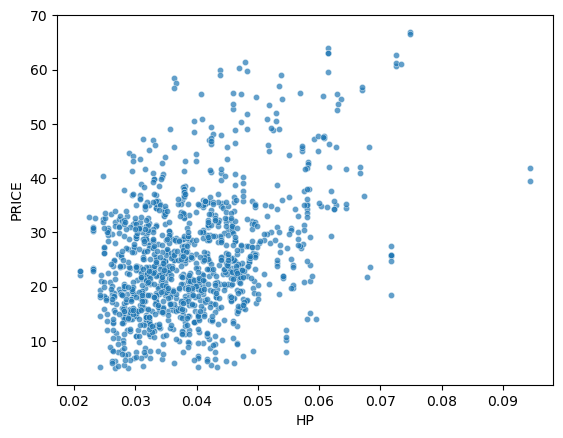

In [6]:
#///////////////////////////////////////////////////////////////////////////////
#----  Codealong: Are more expensive cars more powerful?                    ----
#///////////////////////////////////////////////////////////////////////////////

ax = sns.scatterplot(data=df, x='HP', y='PRICE', alpha=0.7, s=20)


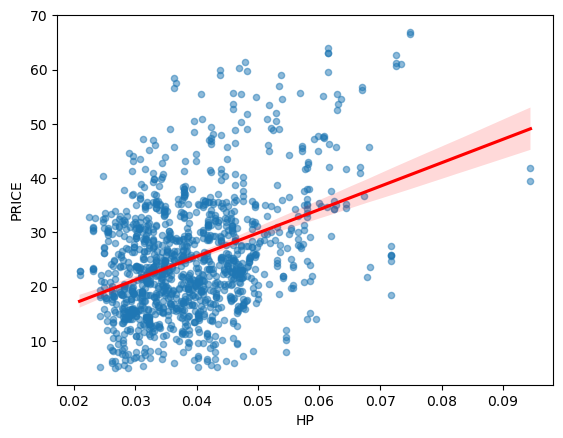

In [7]:
ax = sns.regplot(data=df, x='HP', y='PRICE', scatter_kws={'alpha':0.5, 's':20}, line_kws={'color':'red'})

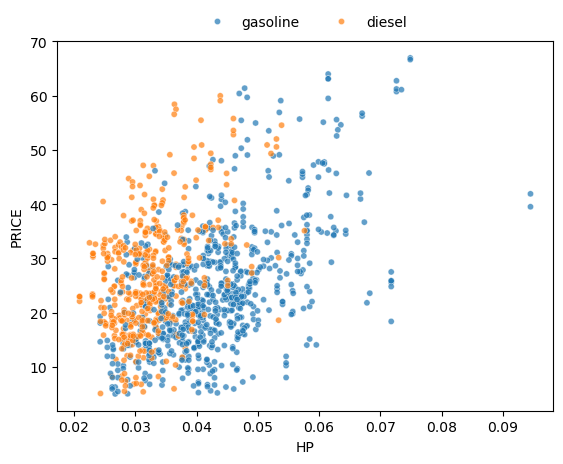

In [8]:
#///////////////////////////////////////////////////////////////////////////////
#----  Codealong: Does this depend by type of fuel?                         ----
#///////////////////////////////////////////////////////////////////////////////
ax = sns.scatterplot(data=df, x='HP', y='PRICE', hue='FUEL', alpha=0.7, s=20)
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False,
)


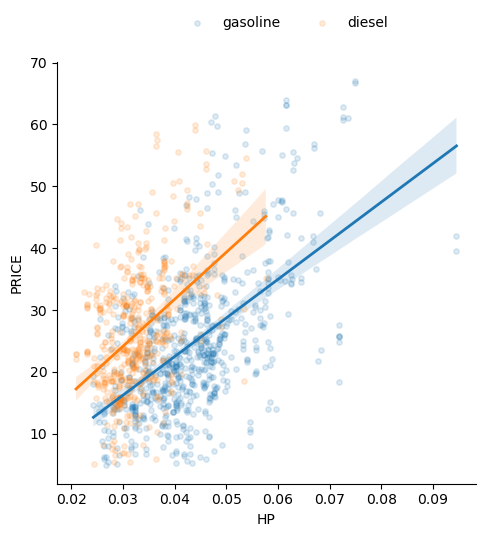

In [9]:
ax = sns.lmplot(data=df, x='HP', y='PRICE', hue='FUEL', scatter_kws={'alpha':0.15, 's':15}, line_kws={'linewidth':2})
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False,
)

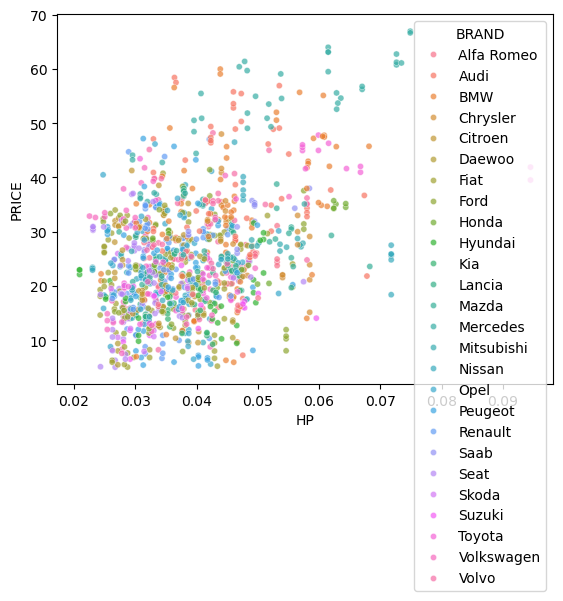

In [10]:
#///////////////////////////////////////////////////////////////////////////////
#----  Codealong: Does the brand matters?                                   ----
#///////////////////////////////////////////////////////////////////////////////
len(set(df['BRAND']))
ax = sns.scatterplot(data=df, x='HP', y='PRICE', hue='BRAND', alpha=0.7, s=20)


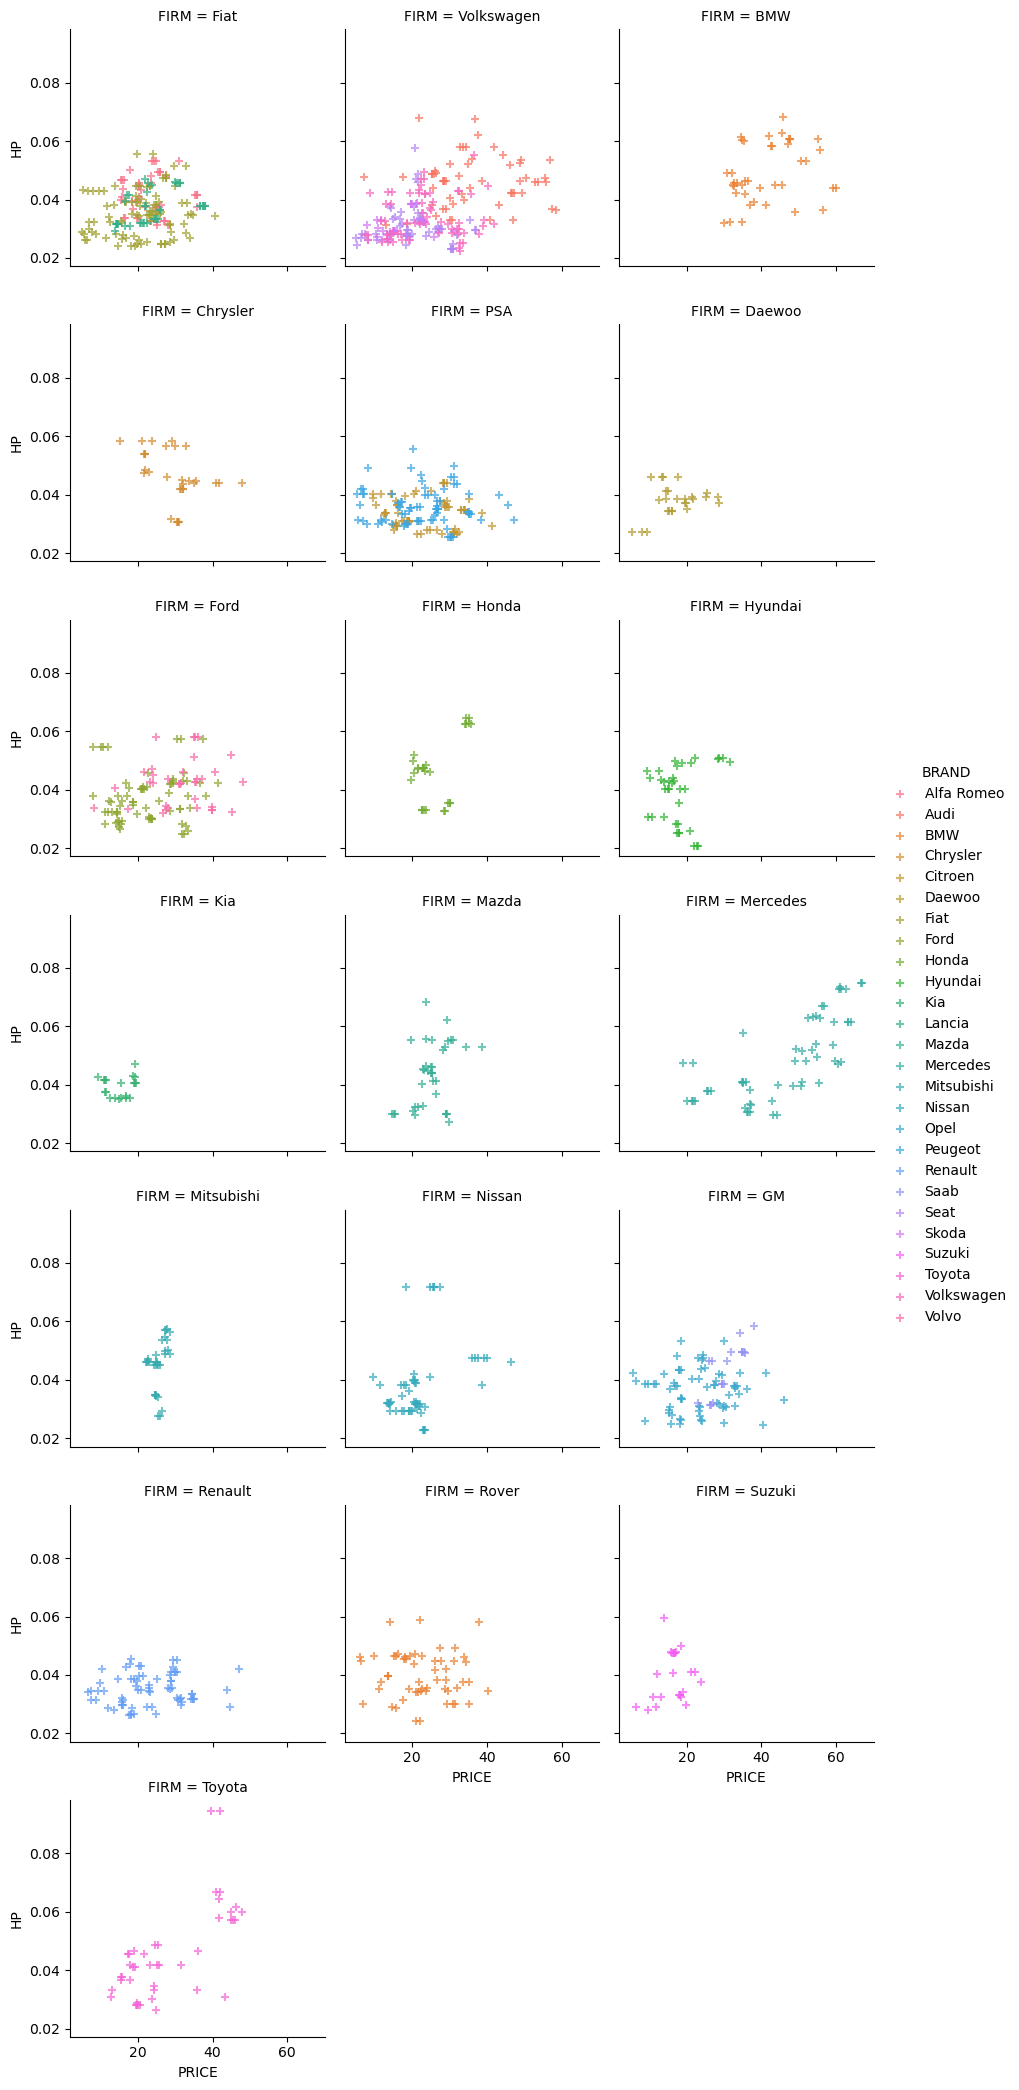

In [11]:
# Lets do better than that
ax = sns.FacetGrid(df, hue='BRAND', col='FIRM', col_wrap = 3)
ax.map(plt.scatter, 'PRICE', 'HP', alpha=0.7, marker = '+')
ax.add_legend()
plt.show()


**Exercise: How is size related to price? Does it differ by firm? By brand? By fuel type?**

Use a facet plot to explore these questions. Restrict the DataFrame to include only Ford, PSA, Volkswagen, and Fiat.

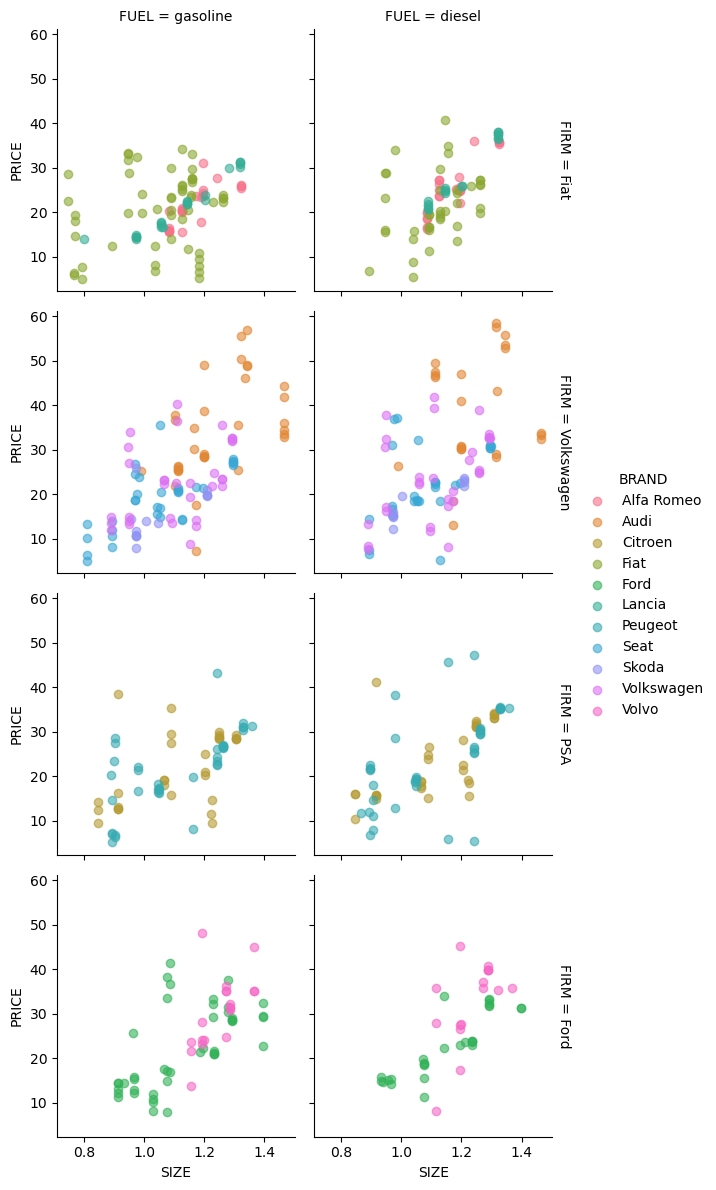

In [12]:
to_plot = df[df['FIRM'].isin(['Volkswagen', 'Ford', 'PSA', 'Fiat'])]
g = sns.FacetGrid(to_plot, hue='BRAND', col='FUEL', row='FIRM', margin_titles=True, height=3)
g.map(plt.scatter, 'SIZE', 'PRICE', alpha=0.6)
g.add_legend()
plt.show()


**Exercise: Facet Plot for Italian and Japanese Cars**

Previously, you explored how size relates to price across different firms, brands, and fuel types using a facet plot. Now, your task is to recreate the same plot but we want to compare Italian and Japanese cars.

You are given a dictionary that maps brands to their respective countries of origin. Use this dictionary to filter the dataset for Italian and Japanese cars separately.

```python
car_brands_by_country = {
    'Italy': ['Alfa Romeo', 'Fiat', 'Lancia'],
    'Germany': ['Audi', 'BMW', 'Mercedes', 'Opel', 'Volkswagen'],
    'USA': ['Chrysler', 'Ford'],
    'France': ['Citroen', 'Peugeot', 'Renault'],
    'South Korea': ['Daewoo', 'Hyundai', 'Kia'],
    'Japan': ['Honda', 'Mazda', 'Mitsubishi', 'Nissan', 'Suzuki', 'Toyota'],
    'Sweden': ['Saab', 'Volvo'],
    'Spain': ['Seat'],
    'Czech Republic': ['Skoda']
}
```

#### Instructions:  
1. Use the dictionary provided to filter the dataset for **Italian** and **Japanese** cars separately.  
2. Create two separate facet plots:  
   - One for Italian cars  
   - One for Japanese cars  
3. Keep the structure of the original facet plot:  
   - `row='FUEL'`  
   - `col='FIRM'`  
   - `hue='BRAND'`  

**Q:** Is the Facet Grid a good way to visualize this data? Why or why not?

In [13]:
italian_cars = df[df['BRAND'].isin(car_brands_by_country['Italy'])]
g_italy = sns.FacetGrid(italian_cars, row='FUEL', col='FIRM', hue='BRAND', margin_titles=True, height=3)
g_italy.map(plt.scatter, 'SIZE', 'PRICE', alpha=0.6)
g_italy.add_legend()
plt.show()
japanese_cars = df[df['BRAND'].isin(car_brands_by_country['Japan'])]
g_japan = sns.FacetGrid(japanese_cars, row='FUEL', col='FIRM', hue='BRAND', margin_titles=True, height=3)
g_japan.map(plt.scatter, 'SIZE', 'PRICE', alpha=0.6)
g_japan.add_legend()
plt.show()


NameError: name 'car_brands_by_country' is not defined

To create a **more meaningful comparison**, we will modify the plot so that **columns represent countries instead of firms**. This will allow us to see how the **size-price relationship** differs across different automotive markets.  

**Q: How does the size-price relationship differ between Italian, German, Japanese, and American cars?**

In [ ]:
brand_to_country = {brand: country for country, brands in car_brands_by_country.items() for brand in brands}
countries = ['Italy', 'Germany', 'Japan', 'USA']
selected_brands = [brand for country in countries for brand in car_brands_by_country[country]]
country_df = df[df['BRAND'].isin(selected_brands)].copy()
country_df['COUNTRY'] = country_df['BRAND'].map(brand_to_country)
g_country = sns.FacetGrid(country_df, row='FUEL', col='COUNTRY', hue='BRAND', col_order=countries, margin_titles=True, height=3)
g_country.map(plt.scatter, 'SIZE', 'PRICE', alpha=0.6)
g_country.add_legend()
plt.show()


**Exercise:**
Replicate the previous facet plot but with the following changes:
- Instead of exploring the relationship between size and price we want to explore the relationship between fuel efficiency (`MPG`) and weight.
- Add a regression line to each plot (recall the `sns.regplot` function)
- Perform this by country and fuel type

In [ ]:
g_mpg = sns.FacetGrid(country_df, row='FUEL', col='COUNTRY', hue='BRAND', col_order=countries, margin_titles=True, height=3)
g_mpg.map_dataframe(sns.scatterplot, x='WEIGHT', y='MPG', alpha=0.6)
g_mpg.map_dataframe(sns.regplot, x='WEIGHT', y='MPG', scatter=False, color='black', line_kws={'linewidth':2})
g_mpg.add_legend()
plt.show()


# 2. MultiIndex and slicing DataFrames

When we use multi-indexing, we're creating "sub-lists." We can slice multi-indexed data in different ways. Using the example below, we could look at just Wisconsin or we could look at Madison within Wisconsin. It's a powerful way to slice data quickly.

We'll also have some other methods such as `.xs()`. This gives us a cross-section of the data at whichever index we'd like. We can also automatically set a multi-index with `index_col` in `read_csv`. There can be multi-indexing for columns, too.

1. Wisconsin
    1. Madison
        1. East
        2. West
    2. Milwaukee
2. Minnesota
    1. Minneapolis
    2. Ely
3. Michigan
    1. Detroit
    2. Grand Rapids
    3. Kalamazoo

In [14]:
# Generate data
soccer = {'team' : ['Man City', 'Man City', 'Man City', 'Man City', 'Chelsea', 'Chelsea'], 
          'player' : ['Walker', 'Stones', 'Foden', 'Jesus', 'Cahill', 'Pedro'],
          'pos' : ['D', 'D', 'M', 'F', 'D', 'F'],
          'goals' : [1, 0, 0, 1, 0, 3],
          'assists': [0,0,0,0,0,0]
         }

# Set index
prem = pd.DataFrame(soccer)
prem.set_index(['team', 'pos'], inplace=True)
prem

player  goals  assists
team     pos                        
Man City D    Walker      1        0
         D    Stones      0        0
         M     Foden      0        0
         F     Jesus      1        0
Chelsea  D    Cahill      0        0
         F     Pedro      3        0

In [15]:
# Slice data
prem.sort_index(axis=0, inplace=True)
prem.loc[('Man City', 'D'),:] 

player  goals  assists
team     pos                        
Man City D    Walker      1        0
         D    Stones      0        0

In [16]:
prem.xs('Man City', level='team', drop_level=False) 

player  goals  assists
team     pos                        
Man City D    Walker      1        0
         D    Stones      0        0
         F     Jesus      1        0
         M     Foden      0        0

In [17]:
prem.xs('D', level='pos', drop_level=False)

player  goals  assists
team     pos                        
Chelsea  D    Cahill      0        0
Man City D    Walker      1        0
         D    Stones      0        0

In [18]:
prem.loc[[('Chelsea', 'D'), ('Man City', 'F'), ('Man City', 'D')]] # .xs can't subset multiple

player  goals  assists
team     pos                        
Chelsea  D    Cahill      0        0
Man City F     Jesus      1        0
         D    Walker      1        0
         D    Stones      0        0

**Exercise – MultiIndex Data Manipulation**

Challenge:
Using the soccer dataset (MultiIndex `prem` DataFrame), try the following:
- Select all players from `Man City` and compute the total goals.
- Extract players in the forward position (`F`) across teams.
- Using a loop, calculate the number of goals by each team

In [19]:
man_city_players = prem.xs('Man City', level='team')
display(man_city_players)
man_city_players['goals'].sum()


,player,goals,assists
pos,,,
D,Walker,1,0
D,Stones,0,0
F,Jesus,1,0
M,Foden,0,0


2

In [20]:
prem.xs('F', level='pos')


,player,goals,assists
team,,,
Chelsea,Pedro,3,0
Man City,Jesus,1,0


In [21]:
goals_by_team = {}
for team in prem.index.get_level_values('team').unique():
    goals_by_team[team] = prem.xs(team, level='team')['goals'].sum()
goals_by_team


{'Chelsea': 3, 'Man City': 2}

# 3. Merging DataFrames

We'll often work with multiple datasets for a single project and need to bring everything together. Merging is useful to do this. The goal is to line up the observations in each file correctly. We can left join, right join, inner join, and outer join following the image below.

In words, left (right) join will keep everything in your "left" ("right") dataset and inner join will only keep rows that have keys in both. You need to specify a key to join on, i.e., how you want to match your two datasets, otherwise you'll create all possible combinations of rows.

<div style="text-align: center;">
  <img src="https://media.geeksforgeeks.org/wp-content/uploads/joinimages.png" 
       alt="Join types in SQL/Pandas" 
       style="width: 500px;"/>
  <p style="font-size: 0.9em; color: gray;">
    Source: GeeksforGeeks (<a href="https://www.geeksforgeeks.org/python/python-pandas-merging-joining-and-concatenating/">link</a>)
  </p>
</div>


In [22]:
#///////////////////////////////////////////////////////////////////////////////
#----  Codealong                                                            ----
#///////////////////////////////////////////////////////////////////////////////
# Create first DataFrame with employee groups
df1 = pd.DataFrame({
    'employee': ['Bob', 'Jake', 'Lisa', 'Sue', 'Larry', 'Sue'],
    'group': ['Accounting', 'Engineering', 'Engineering', 'HR', 'Bird', 'Legal']
})

# Create second DataFrame with salary information
df2 = pd.DataFrame({
    'name': ['Bob', 'Jake', 'Lisa', 'Sue', 'Hannah', 'Sue'],
    'salary': [70000, 80000, 120000, 90000, 1000000, 300000]
})

print("Employee Data:")
display(df1)
print("\nSalary Data:")
display(df2)


Employee Data:


,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR
4,Larry,Bird
5,Sue,Legal



Salary Data:


,name,salary
0,Bob,70000
1,Jake,80000
2,Lisa,120000
3,Sue,90000
4,Hannah,1000000
5,Sue,300000


In [23]:
# Merge
merged_inner = pd.merge(df1, df2, left_on="employee", right_on="name", how='inner')
print("Inner Merge Result:")
merged_inner

Inner Merge Result:


,employee,group,name,salary
0,Bob,Accounting,Bob,70000
1,Jake,Engineering,Jake,80000
2,Lisa,Engineering,Lisa,120000
3,Sue,HR,Sue,90000
4,Sue,HR,Sue,300000
5,Sue,Legal,Sue,90000
6,Sue,Legal,Sue,300000


**Exercise – Merge Variations**

Challenge:
Now, perform the following with your DataFrames:
- Execute a left join (merge) on the same data. Identify the rows where salary information is missing.
  - Change the `how` parameter to `left` in the `merge` function.
- Try a full outer join and observe which rows from both DataFrames appear.
  - Change the `how` parameter to `outer` in the `merge` function.

In [27]:
merged_left = pd.merge(df1, df2, left_on='employee', right_on='name', how='left')
print('Left Merge Result:')
display(merged_left)
print('Rows with missing salary:')
missing_salary = merged_left[merged_left['salary'].isna()]
display(missing_salary)
merged_outer = pd.merge(df1, df2, left_on='employee', right_on='name', how='outer')
print('Outer Merge Result:')
merged_outer


Left Merge Result:


,employee,group,name,salary
0,Bob,Accounting,Bob,70000.0
1,Jake,Engineering,Jake,80000.0
2,Lisa,Engineering,Lisa,120000.0
3,Sue,HR,Sue,90000.0
4,Sue,HR,Sue,300000.0
5,Larry,Bird,NaN,NaN
6,Sue,Legal,Sue,90000.0
7,Sue,Legal,Sue,300000.0


Rows with missing salary:


,employee,group,name,salary
5,Larry,Bird,NaN,NaN


Outer Merge Result:


,employee,group,name,salary
0,Bob,Accounting,Bob,70000.0
1,NaN,NaN,Hannah,1000000.0
2,Jake,Engineering,Jake,80000.0
3,Larry,Bird,NaN,NaN
4,Lisa,Engineering,Lisa,120000.0
5,Sue,HR,Sue,90000.0
6,Sue,HR,Sue,300000.0
7,Sue,Legal,Sue,90000.0
8,Sue,Legal,Sue,300000.0


## Summary

Today’s session covered:
- **Facet Grids with Seaborn:** Exploring relationships (e.g., Price vs. HP, Price vs. SIZE) with multi-dimensional data plots. We also practiced overlaying regression lines and customizing axes.
- **MultiIndex Operations:** Creating and slicing MultiIndex DataFrames for quick subsetting and aggregation.
- **Merging DataFrames:** Combining datasets using various types of joins (inner, left, outer) and handling missing data.


## Have a great weekend!